## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## Import Data

In [3]:
#The breast cancer data used can be found in the sklearn library. 
from sklearn.datasets import load_breast_cancer
#Save the data
cancer_data = load_breast_cancer()

## Convert the Data
The data was imported in the numpy array format. For data manipulation purpose, we can convert the data to pandas dataframe. The data, target, features names, and target names all came in numpy array. The conversion will result into a nice data table for visualization and manipulation. 

In [7]:
df_cancer_data = pd.DataFrame(np.c_[cancer_data['data'], cancer_data['target']], columns = np.append(cancer_data['feature_names'], ['target']))

In [8]:
df_cancer_data.shape

(569, 31)

The cancer data has 569 rows and 31 columns including the target. 

## Exploratory Data Analysis

To understand the data, some plots can help shine light to what the data is saying. Below, we will generate visuals to better understand the data. A little context to understand the target data: 0 is malignant which means it is a life treating case of the breast cancer, and 1 means benign which means, the less severe case. The problem is a classification problem. 

### Countplot

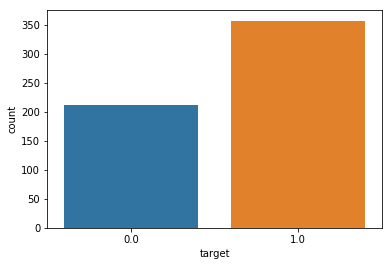

In [11]:
sns.countplot(df_cancer_data["target"], label = "Count")

## Model
The data set contains the target variable which is the target, so lets drop that before training the model

In [14]:
X = df_cancer_data.drop(['target'], axis = 1)
y = df_cancer_data['target']

### Split the data

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [16]:
X_train.shape

(455, 30)

## Scaling

In [23]:
min_train = X_train.min()
range_train = (X_train-min_train).max()
X_train_scaled = (X_train -min_train)/range_train

In [24]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

## Training

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
model = SVC()
model.fit(X_train_scaled, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [26]:
y_predict = model.predict(X_test_scaled)
cmt = confusion_matrix(y_test, y_predict)

## Visualize the confusion matrix plot

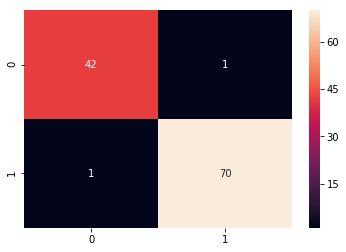

In [27]:
sns.heatmap(cmt, annot=True)

### Get an evaluation report 

In [28]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        43
         1.0       0.99      0.99      0.99        71

   micro avg       0.98      0.98      0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

